In [53]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Orignal GA data

# item_1 = "org_res/results_269.csv"
# item_2 = "org_res/results_995.csv"
# item_3 = "org_res/results_10000.csv"

# GA data from mod1

item_1 = "m1_res/results_269.csv"
item_2 = "m1_res/results_995.csv"
item_3 = "m1_res/results_10000.csv"

# GA data from mod2

# item_1 = "m2_res/results_269.csv"
# item_2 = "m2_res/results_995.csv"
# item_3 = "m2_res/results_10000.csv"

items_269 = pd.read_csv(item_1)
items_995 = pd.read_csv(item_2)
items_10000 = pd.read_csv(item_3)

In [54]:
def create_table(df):
    
    # Parse the mean_over_gen column if it exists, with error handling
    if 'mean_over_gen' in df.columns:
        def safe_parse(x):
            try:
                return ast.literal_eval(x)
            except (ValueError, SyntaxError):
                # If parsing fails, return None or empty list
                print(f"Warning: Could not parse mean_over_gen data (truncated or malformed)")
                return []
        
        df['mean_over_gen'] = df['mean_over_gen'].apply(safe_parse)
    
    # Create the results table using the correct column names
    results_table = pd.DataFrame({
        'Total Value': df['max_value'].values,
        'Total Weight': df['max_weight'].values
    })
    
    # Add run labels based on the seeds (index values)
    results_table.index = [f'Run {i+1} (Seed {seed})' for i, seed in enumerate(df.index)]
    
    # Calculate statistics
    mean_value = results_table['Total Value'].mean()
    std_value = results_table['Total Value'].std()
    mean_weight = results_table['Total Weight'].mean()
    std_weight = results_table['Total Weight'].std()
    
    # Create summary rows
    summary_data = pd.DataFrame({
        'Total Value': [mean_value, std_value],
        'Total Weight': [mean_weight, std_weight]
    }, index=['Mean', 'Standard Deviation'])
    
    # Combine the results table with summary
    final_table = pd.concat([results_table, summary_data])
    
    # Format for better display
    print("Knapsack Problem: GA Results Summary (5 Different Random Seeds)")
    print("=" * 70)
    print(final_table.round(2))
    
    # Additional analysis
    print(f"\nAnalysis:")
    best_run_idx = results_table['Total Value'].idxmax()
    best_value = results_table.loc[best_run_idx, 'Total Value']
    best_weight = results_table.loc[best_run_idx, 'Total Weight']
    print(f"Best Solution: {best_run_idx}")
    print(f"  - Total Value: {best_value}")
    print(f"  - Total Weight: {best_weight}")
    
    worst_run_idx = results_table['Total Value'].idxmin()
    worst_value = results_table.loc[worst_run_idx, 'Total Value']
    print(f"Worst Solution: {worst_run_idx}")
    print(f"  - Total Value: {worst_value}")
    
    print(f"\nVariability:")
    print(f"Value Range: {results_table['Total Value'].max() - results_table['Total Value'].min()}")
    print(f"Weight Range: {results_table['Total Weight'].max() - results_table['Total Weight'].min()}")
    
    return final_table

# Use the simple version to avoid parsing issues:
# table = create_table_simple(items_269)

In [55]:

table = create_table(items_269)

Knapsack Problem: GA Results Summary (5 Different Random Seeds)
                    Total Value  Total Weight
Run 1 (Seed 0)            295.0         269.0
Run 2 (Seed 1)            295.0         269.0
Run 3 (Seed 2)            295.0         269.0
Run 4 (Seed 3)            295.0         269.0
Run 5 (Seed 4)            295.0         269.0
Mean                      295.0         269.0
Standard Deviation          0.0           0.0

Analysis:
Best Solution: Run 1 (Seed 0)
  - Total Value: 295
  - Total Weight: 269
Worst Solution: Run 1 (Seed 0)
  - Total Value: 295

Variability:
Value Range: 0
Weight Range: 0


In [56]:

table = create_table(items_10000)

Knapsack Problem: GA Results Summary (5 Different Random Seeds)
                    Total Value  Total Weight
Run 1 (Seed 0)          9767.00       9768.00
Run 2 (Seed 1)          9767.00       9768.00
Run 3 (Seed 2)          9767.00       9768.00
Run 4 (Seed 3)          9763.00       9764.00
Run 5 (Seed 4)          9767.00       9768.00
Mean                    9766.20       9767.20
Standard Deviation         1.79          1.79

Analysis:
Best Solution: Run 1 (Seed 0)
  - Total Value: 9767
  - Total Weight: 9768
Worst Solution: Run 4 (Seed 3)
  - Total Value: 9763

Variability:
Value Range: 4
Weight Range: 4


In [57]:

table = create_table(items_995)

Knapsack Problem: GA Results Summary (5 Different Random Seeds)
                    Total Value  Total Weight
Run 1 (Seed 0)          1072.00        991.00
Run 2 (Seed 1)          1106.00        991.00
Run 3 (Seed 2)          1034.00        995.00
Run 4 (Seed 3)          1278.00        995.00
Run 5 (Seed 4)          1334.00        979.00
Mean                    1164.80        990.20
Standard Deviation       132.87          6.57

Analysis:
Best Solution: Run 5 (Seed 4)
  - Total Value: 1334
  - Total Weight: 979
Worst Solution: Run 3 (Seed 2)
  - Total Value: 1034

Variability:
Value Range: 300
Weight Range: 16


In [58]:
items_269 = pd.read_csv(item_1)
items_995 = pd.read_csv(item_2)
items_10000 = pd.read_csv(item_3)

In [59]:
def graph_convergens(items, title):
    items_to_plot = items.drop(columns=["max_weight", "max_value"])

    items_to_plot['mean_over_gen'] = items_to_plot['mean_over_gen'].apply(
    lambda x: [float(v) for v in ast.literal_eval(x)]
    )

    for idx, row in items_to_plot.iterrows():
        plt.plot(row['mean_over_gen'], label=f"{row['Unnamed: 0']}")

    plt.title(f"Convergence of Mean Value Over Generations: {title}")
    plt.xlabel("Generation")
    plt.ylabel("Mean Fitness Value")
    plt.legend(title="Seeds")
    plt.show()

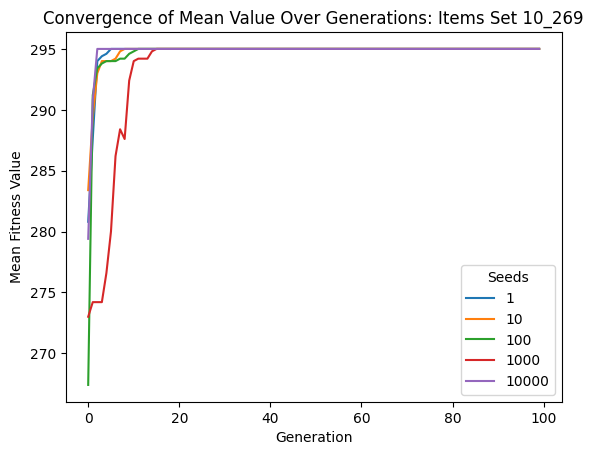

In [60]:
graph_convergens(items_269, "Items Set 10_269")

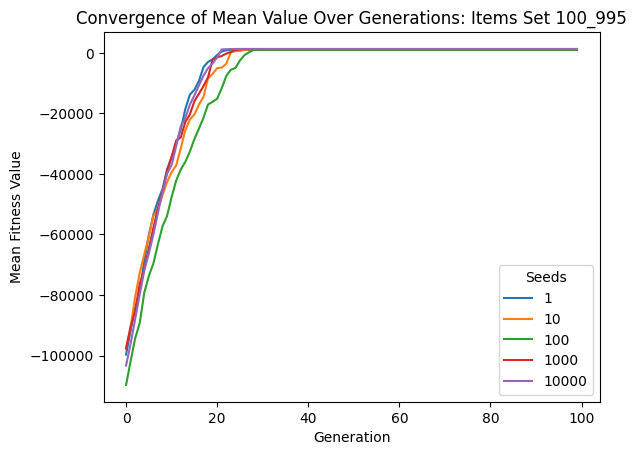

In [61]:
graph_convergens(items_995, "Items Set 100_995")

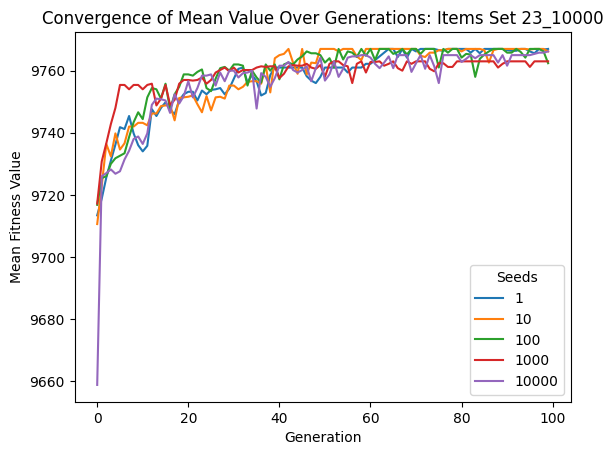

In [62]:
graph_convergens(items_10000, "Items Set 23_10000")